# Importing Libraries

In [45]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [47]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential # class of NN
from keras.layers import Convolution2D # class for adding convulution
from keras.layers import MaxPooling2D # pooling layer class
from keras.layers import Flatten # flatten layer class
from keras.layers import Dense, Dropout # other normal layer in nn
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from joblib import dump

In [46]:
os.listdir('datasets')

['test_set', 'training_set']

In [48]:
# Initialising the CNN
classifier = Sequential()
classifier.add(Convolution2D(filters= 16,
                             kernel_size= (5, 5), 
                             input_shape = (512, 512,1),
                             activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Convolution2D(filters = 32,
                             kernel_size = (5, 5), 
                             activation = 'relu'))
# adding a second maxpooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

In [49]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 508, 508, 16)      416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 254, 254, 16)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 254, 254, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 250, 250, 32)      12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 125, 125, 32)     

In [50]:
def to_grayscale_then_rgb(image):
    # image = tf.image.rgb_to_grayscale(image)
    # image = tf.image.grayscale_to_rgb(image)
    return image

In [51]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   preprocessing_function=to_grayscale_then_rgb,   )
test_datagen = ImageDataGenerator(rescale = 1/255,preprocessing_function=to_grayscale_then_rgb)

In [52]:
ts= train_datagen.flow_from_directory(
        'datasets/training_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode='grayscale')
tx = test_datagen.flow_from_directory(
        'datasets/test_set',
        target_size = (512,512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode='grayscale')

Found 200 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [53]:
ts.image_shape

(512, 512, 1)

In [54]:
history = classifier.fit(ts,
                         steps_per_epoch= 5,
                         epochs=50,
                         validation_data = tx,
                         validation_steps= 20)

Epoch 1/50
5/5 [==============================] - 10s 2s/step - loss: 34.6217 - accuracy: 0.6000 - val_loss: 9.6131 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 7s 2s/step - loss: 9.5052 - accuracy: 0.4000 - val_loss: 0.6972 - val_accuracy: 0.4500
Epoch 3/50
5/5 [==============================] - 7s 2s/step - loss: 0.6982 - accuracy: 0.6000 - val_loss: 0.7120 - val_accuracy: 0.4000
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 0.7732 - accuracy: 0.6000 - val_loss: 0.6905 - val_accuracy: 0.5500
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4500
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.7006 - accuracy: 0.4000 - val_loss: 0.6938 - val_accuracy: 0.4250
Epoch 7/50
5/5 [==============================] - 6s 1s/step - loss: 0.6874 - accuracy: 0.7000 - val_loss: 0.6941 - val_accuracy: 0.4000
Epoch 8/50
5/5 [=======================

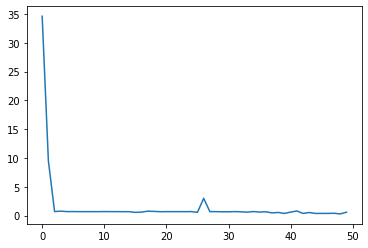

In [55]:
plt.plot(history.history['loss'])

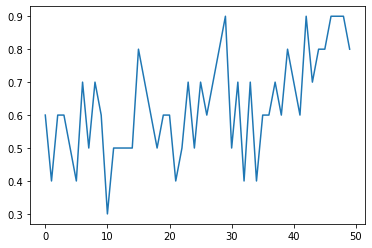

In [56]:
plt.plot(history.history['accuracy'])

In [57]:
classifier.evaluate(tx)

60/60 [==============================] - 6s 97ms/step - loss: 0.4231 - accuracy: 0.9083


[0.42305895686149597, 0.9083333611488342]

In [58]:
model_dict={
    'title':'Handwriting Recognition Model',
    'classifier':classifier
}

dump(model_dict, "hand_ap.pkl")

INFO:tensorflow:Assets written to: ram://46704dfd-a30f-48b2-a0f6-596cc39f7798/assets


INFO:tensorflow:Assets written to: ram://46704dfd-a30f-48b2-a0f6-596cc39f7798/assets


['hand_ap.pkl']

In [59]:
from joblib import load

In [60]:
def load_model():
    filepath = 'hand_ap.pkl'
    return load(filepath)

In [61]:
classifier.save('classifier.h5')

In [62]:
classifier = tf.keras.models.load_model('classifier.h5')

In [63]:
import numpy as np

In [64]:
img =tf.keras.utils.load_img('E:\Handwriting Recognition\datasets/test_set/Akash/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinput =tf.keras.utils.img_to_array(img)
np.array([xinput]).shape

(1, 512, 512, 1)

In [65]:
img =tf.keras.utils.load_img(f'E:\Handwriting Recognition\datasets/training_set\Anmol/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinput =tf.keras.utils.img_to_array(img)
prediction = classifier.predict(np.array([xinput]))[0]
print(prediction)
if prediction <.5:
    print('first person')
else:
    print('second person')

1/1 [==============================] - 1s 577ms/step
[1.]
second person


In [66]:
classifier.predict(tx)

60/60 [==============================] - 7s 112ms/step


array([[0.1547053 ],
       [0.34756297],
       [0.07843984],
       [0.7688054 ],
       [0.60258454],
       [0.65623343],
       [0.54812247],
       [0.34557736],
       [0.11116707],
       [0.33465287],
       [0.66756696],
       [0.37250212],
       [0.7249748 ],
       [0.18643375],
       [0.00098188],
       [0.49422932],
       [0.40582398],
       [0.37152192],
       [0.6309213 ],
       [0.08195664],
       [0.06536374],
       [0.5341557 ],
       [0.66307336],
       [0.4048504 ],
       [0.57602984],
       [0.31711686],
       [0.03324784],
       [0.63453335],
       [0.15093887],
       [0.1319509 ],
       [0.45320046],
       [0.5239505 ],
       [0.49847254],
       [0.15940839],
       [0.8356215 ],
       [0.5904603 ],
       [0.1502541 ],
       [0.3724551 ],
       [0.14559828],
       [0.4689331 ],
       [0.58862275],
       [0.66387844],
       [0.8327191 ],
       [0.48697102],
       [0.19582829],
       [0.52768743],
       [0.17687596],
       [0.176

In [67]:
answers = [] 
for i in range(11,50):
    img =tf.keras.utils.load_img(f'E:\Handwriting Recognition\datasets/training_set\Akash/{i}.jpg',color_mode='grayscale',target_size=(512,512,1))
    xinput =tf.keras.utils.img_to_array(img)
    # img.show()
    prediction = classifier.predict(np.array([xinput]))[0]
    print(prediction)

    if prediction <.5:
        print('first person')
        answers.append(0)
    else:
        print('second person')
        answers.append(1)

1/1 [==============================] - 0s 98ms/step
[0.]
first person
1/1 [==============================] - 0s 80ms/step
[0.]
first person
1/1 [==============================] - 0s 71ms/step
[0.]
first person
1/1 [==============================] - 0s 71ms/step
[0.]
first person
1/1 [==============================] - 0s 105ms/step
[0.9833129]
second person
1/1 [==============================] - 0s 82ms/step
[0.]
first person
1/1 [==============================] - 0s 75ms/step
[0.]
first person
1/1 [==============================] - 0s 78ms/step
[0.]
first person
1/1 [==============================] - 0s 101ms/step
[0.]
first person
1/1 [==============================] - 0s 116ms/step
[0.]
first person
1/1 [==============================] - 0s 89ms/step
[0.]
first person
1/1 [==============================] - 0s 104ms/step
[0.]
first person
1/1 [==============================] - 0s 112ms/step
[8.1234776e-35]
first person
1/1 [==============================] - 0s 103ms/step
[0.]
first pe

In [68]:
print(answers)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
